In [0]:
!sudo apt install libdb5.3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  db5.3-doc
The following NEW packages will be installed:
  libdb5.3-dev
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 762 kB of archives.
After this operation, 3,146 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libdb5.3-dev amd64 5.3.28-13.1ubuntu1 [762 kB]
Fetched 762 kB in 1s (942 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libdb5.3-dev.
(Readi

In [0]:
!pip3 install --upgrade setuptools
!pip3 install gutenberg

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (40.8.0)
    100% |████████████████████████████████| 245kB 27.8MB/s 
    100% |████████████████████████████████| 348kB 24.6MB/s 
    100% |████████████████████████████████| 1.0MB 19.3MB/s 
    100% |████████████████████████████████| 51kB 19.4MB/s 
    100% |████████████████████████████████| 573kB 23.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/8e/cd/75/4bc6f16541a1b7a69b02168da567695b2271c23ac4a0a0a453
  Stored in directory: /root/.cache/pip/wheels/11/b8/b3/fa84db10bf8c563e4ba1a72837a0946d123f12adb34b164bf5
  Stored in directory: /root/.cache/pip/wheels/f9/71/46/604b8a4f0a04b513f5799c974b556c1de19a70fde41d25672b
  Stored in directory: /root/.cache/pip/wheels/15/35/25/dbcb848832ccb1a4b4ad23f529badfd3bce9bf88017f7ca510
Successfully built gutenberg bsddb3 alembic Mako


In [0]:
!pwd

/content


In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!fusermount -u gdrive
#!rmdir gdrive

fusermount: failed to unmount /content/gutenberg_data: Invalid argument


In [0]:
!ln -s /content/gdrive/My\ Drive/gutenberg/gutenberg_data /content/gutenberg_data

In [0]:
!ls -al /content/gutenberg_data/metadata/metadata.db

total 3697408
-rw------- 1 root root     16384 Mar  2 03:05  contexts
-rw------- 1 root root 909377536 Mar  2 03:05 'c^o^s^p^'
-rw------- 1 root root 942211072 Mar  2 03:05 'c^p^o^s^'
-rw------- 1 root root 915693568 Mar  2 03:06 'c^s^p^o^'
-rw------- 1 root root    999424 Mar  2 03:05  __db.001
-rw------- 1 root root   1441792 Mar  2 03:06  __db.002
-rw------- 1 root root  65544192 Mar  2 03:06  __db.003
-rw------- 1 root root 285048832 Mar  2 03:06  i2k
-rw------- 1 root root 665780224 Mar  2 03:06  k2i
-rw------- 1 root root     16384 Mar  2 03:05  namespace
-rw------- 1 root root     16384 Mar  2 03:05  prefix


In [0]:
try:
    GUTENBERG = True
    from gutenberg.acquire import load_etext
    from gutenberg.query import get_etexts, get_metadata
    from gutenberg.acquire import get_metadata_cache
    from gutenberg.acquire.text import UnknownDownloadUriException
    from gutenberg.cleanup import strip_headers
    from gutenberg._domain_model.exceptions import CacheAlreadyExistsException
except ImportError:
    GUTENBERG = False
    print('Gutenberg is not installed. See instructions at https://pypi.python.org/pypi/Gutenberg')
#import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import TimeDistributed
import tensorflow.keras.callbacks
import tensorflow.keras.backend as K
import scipy.misc
import json

import os, sys
import re
import PIL
from PIL import ImageDraw

from tensorflow.keras.optimizers import RMSprop
import random
import numpy as np
import tensorflow as tf
from keras.utils import get_file

from IPython.display import clear_output, Image, display, HTML
try:
    from io import BytesIO
except ImportError:
    from StringIO import StringIO as BytesIO

Using TensorFlow backend.


In [0]:
if GUTENBERG:
    cache = get_metadata_cache()
    try:
        cache.populate()
    except CacheAlreadyExistsException as e:
        print(e)
        pass

location: /root/gutenberg_data/metadata/metadata.db


In [0]:
if GUTENBERG:
    for text_id in get_etexts('author', 'Shakespeare, William'):
        print(text_id, list(get_metadata('title', text_id))[0])

1536 The Life of Timon of Athens
1537 Pericles, Prince of Tyre
1538 Cymbeline
1539 The Winter's Tale
1540 The Tempest
1541 The Life of Henry the Eighth
1543 A Lover's Complaint
1544 The Passionate Pilgrim
1545 The Passionate Pilgrim
1546 Sonnets on Sundry Notes of Music
1528 The History of Troilus and Cressida
1529 All's Well That Ends Well
1041 Shakespeare's Sonnets
1530 Measure for Measure
1045 Venus and Adonis
1531 Othello, the Moor of Venice
1533 Macbeth
10281 Antony's Address over the Body of Caesar
From Julius Caesar
12842 A Fairy Tale in Two Acts Taken from Shakespeare (1763)
13868 Macbeth
15418 Ang Sintang Dalisay ni Julieta at Romeo
15942 Antoine et Cléopâtre
1100 The First Part of Henry the Sixth
1101 The Second Part of King Henry the Sixth
1102 The Third Part of King Henry the Sixth
1103 King Richard III
1104 The Comedy of Errors
1105 The Sonnets
1106 The Tragedy of Titus Andronicus
1107 The Taming of the Shrew
1108 The Two Gentlemen of Verona
1109 Love's Labour's Lost
1110 

In [0]:
shakespeare_id = 100
casanova_id = 2981 
clarissa_ids = [9296, 9798, 9881, 10462, 10799, 11364, 11889, 12180, 12398]

def load_etext_from(ids, filter_func):
  etext = '\n'.join([filter_func(strip_headers(load_etext(id))) \
                     for id in ids])
  return etext

In [0]:
shakespeare = load_etext_from([shakespeare_id], lambda text: text.split('\nTHE END', 1)[-1])
print(len(shakespeare))
shakespeare[:1000]

5528070


'\n\n\n\nALL’S WELL THAT ENDS WELL\n\n\nby William Shakespeare\n\n\n\nContents\n\nACT I\nScene I. Rossillon. A room in the Countess’s palace.\nScene II. Paris. A room in the King’s palace.\nScene III. Rossillon. A Room in the Palace.\n\n\nACT II\nScene I. Paris. A room in the King’s palace.\nScene II. Rossillon. A room in the Countess’s palace.\nScene III. Paris. The King’s palace.\nScene IV. Paris. The King’s palace.\nScene V. Another room in the same.\n\n\nACT III\nScene I. Florence. A room in the Duke’s palace.\nScene II. Rossillon. A room in the Countess’s palace.\nScene III. Florence. Before the Duke’s palace.\nScene IV. Rossillon. A room in the Countess’s palace.\nScene V. Without the walls of Florence.\nScene VI. Camp before Florence.\nScene VII. Florence. A room in the Widow’s house.\n\n\nACT IV\nScene I. Without the Florentine camp.\nScene II. Florence. A room in the Widow’s house.\nScene III. The Florentine camp.\nScene IV. Florence. A room in the Widow’s house.\nScene V. Ros

In [0]:
casanova = load_etext_from([casanova_id], lambda text: text.split('\nCASANOVA AT DUX', 1)[-1]) # from main contents
print(len(casanova))
casanova[:1000]

6685264


'\n\n An Unpublished Chapter of History, By Arthur Symons\n\n I\n The Memoirs of Casanova, though they have enjoyed the popularity of a bad reputation, have never had justice done to them by serious students of literature, of life, and of history. One English writer, indeed, Mr. Havelock Ellis, has realised that ‘there are few more delightful books in the world,’ and he has analysed them in an essay on Casanova, published in Affirmations, with extreme care and remarkable subtlety. But this essay stands alone, at all events in English, as an attempt to take Casanova seriously, to show him in his relation to his time, and in his relation to human problems. And yet these Memoirs are perhaps the most valuable document which we possess on the society of the eighteenth century; they are the history of a unique life, a unique personality, one of the greatest of autobiographies; as a record of adventures, they are more entertaining than Gil Blas, or Monte Cristo, or any of the imaginary travel

In [0]:
clarissa = load_etext_from(clarissa_ids, lambda text: text.split('\nTHE HISTORY OF CLARISSA HARLOWE', 1)[-1]) # from main contents
print(len(clarissa))
clarissa[:1000]

5173348


"\n\n\n\n\nLETTER I\n\nMISS ANNA HOWE, TO MISS CLARISSA HARLOWE JAN 10.\n\n\nI am extremely concerned, my dearest friend, for the disturbances that\nhave happened in your family. I know how it must hurt you to become\nthe subject of the public talk: and yet, upon an occasion so generally\nknown, it is impossible but that whatever relates to a young lady, whose\ndistinguished merits have made her the public care, should engage every\nbody's attention. I long to have the particulars from yourself; and of\nthe usage I am told you receive upon an accident you could not help; and\nin which, as far as I can learn, the sufferer was the aggressor.\n\nMr. Diggs, the surgeon, whom I sent for at the first hearing of the\nrencounter, to inquire, for your sake, how your brother was, told me,\nthat there was no danger from the wound, if there were none from the\nfever; which it seems has been increased by the perturbation of his\nspirits.\n\nMr. Wyerley drank tea with us yesterday; and though he is 

In [0]:
def get_chars_index(etext):
  chars = list(sorted(set(etext)))
  char_to_idx = {ch: idx for idx, ch in enumerate(chars)}
  return chars, char_to_idx

def generate_meta_from(etext, model_name, chunk_size=160):
  etext_meta = {}
  etext_meta['model_name'] = model_name
  etext_meta['char'], etext_meta['char_to_idx'] = get_chars_index(etext)
  etext_meta['chunk_size'] = chunk_size
  return etext_meta
  
shakespeare_meta = generate_meta_from(shakespeare, 'shakespeare')
casanova_meta = generate_meta_from(casanova, 'casanova')
clarissa_meta = generate_meta_from(clarissa, 'clarissa')


In [0]:
def char_rnn_model(chunk_size, num_chars, num_layers, num_nodes=512, dropout=0.1):
    input = Input(shape=(chunk_size, num_chars), name='input')
    prev = input
    for i in range(num_layers):
        lstm = LSTM(num_nodes, return_sequences=True, name='lstm_layer_%d' % (i + 1))(prev)
        if dropout:
            prev = Dropout(dropout)(lstm)
        else:
            prev = lstm
    dense = TimeDistributed(Dense(num_chars, name='dense', activation='softmax'))(prev)
    model = Model(inputs=[input], outputs=[dense])
    optimizer = tf.train.RMSPropOptimizer(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def get_tpu_model(compiled_model, tpu_address):
  return tf.contrib.tpu.keras_to_tpu_model(compiled_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(
      tf.contrib.cluster_resolver.TPUClusterResolver(tpu_address)))
  
  
def data_generator(all_text, char_to_idx, batch_size, chunk_size):
    X = np.zeros((batch_size, chunk_size, len(char_to_idx)))
    y = np.zeros((batch_size, chunk_size, len(char_to_idx)))
    while True:
        for row in range(batch_size):
            idx = random.randrange(len(all_text) - chunk_size - 1)
            chunk = np.zeros((chunk_size + 1, len(char_to_idx)))
            for i in range(chunk_size + 1):
                chunk[i, char_to_idx[all_text[idx + i]]] = 1
            X[row, :, :] = chunk[:chunk_size]
            y[row, :, :] = chunk[1:]
        yield X, y

#next(data_generator(training_text, char_to_idx, 4, chunk_size=CHUNK_SIZE))  

# TPU 관련 설정
try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))
except KeyError:
  print('TPU not found')

Found TPU at: grpc://10.112.95.250:8470


In [0]:
CHUNK_SIZE = 160

clarissa_model = get_tpu_model(char_rnn_model(clarissa_meta['chunk_size'], len(clarissa_meta['char']), num_layers=2, num_nodes=640, dropout=0), TPU_ADDRESS)
print(clarissa_model.summary())

INFO:tensorflow:Querying Tensorflow master (grpc://10.112.95.250:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 12284464179694512849)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 17918052039150788383)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 10839526694855656025)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 3122826369630911206)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 1959499061609068135)
INFO:tensorflow:*** Available Device: _DeviceAttribute

In [0]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=10,
                              verbose=0, mode='auto')

BATCH_SIZE = 256
clarissa_model.fit_generator(
    data_generator(clarissa, clarissa_meta['char_to_idx'], batch_size=BATCH_SIZE, chunk_size=clarissa_meta['chunk_size']),
    epochs=40,
    callbacks=[early,],
    steps_per_epoch=int(2 * len(clarissa) / (BATCH_SIZE * CHUNK_SIZE)),
    verbose=2
)

Epoch 1/40
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(32,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(32, 160, 98), dtype=tf.float32, name='input_70'), TensorSpec(shape=(32, 160, 98), dtype=tf.float32, name='time_distributed_3_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for input
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 8.475114107131958 secs
INFO:tensorflow:Setting weights on TPU model.
 - 113s - loss: 3.5677 - acc: 0.1466
Epoch 2/40
 - 95s - loss: 3.2032 - acc: 0.1596
Epoch 3/40
 - 95s - loss: 2.1013 - acc: 0.4131
Epoch 4/40
 - 94s - loss: 1.4314 - acc: 0.5931
Epoch 5/40
 - 94s - loss: 1.3354 - acc: 0.6200
Epoch 6/40
 - 94s - loss: 1.3195 - acc: 0.6301
Epoch 7/40
 - 94s - loss: 1.2690 - acc: 0.6414
Epoch 8/40
 - 95s - loss: 1.2437 

In [0]:
def save_model(basepath, model, model_meta):
  base_file_path = basepath + '/' + model_meta['model_name']
  with open(base_file_path + '.json', 'w') as fout:
      json.dump({
          'chars': ''.join(model_meta['char']),
          'char_to_idx': model_meta['char_to_idx'] ,
          'chunk_size': CHUNK_SIZE,
      }, fout)
  model.save(base_file_path +'.h5')
  model.save_weights(base_file_path + '_weights.h5')
  


!ls -al /content/gutenberg_data/models/

basepath = '/content/gutenberg_data/models/02/'

save_model(basepath, clarissa_model, clarissa_meta)


total 8
drwx------ 2 root root 4096 Mar  2 06:08 01
drwx------ 2 root root 4096 Mar  3 03:19 02
INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:Copying TPU weights to the CPU


In [0]:
# prediction from saved weights

def load_model(basepath, model_meta):
  model = char_rnn_model(None, len(model_meta['char']), num_layers=2, num_nodes=640, dropout=0) 
  model.load_weights(basepath + "/" + model_meta['model_name'] + '_weights.h5')
  return model
  

prediction_model = load_model(basepath, clarissa_meta)
prediction_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 98)          0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 640)         1891840   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, None, 640)         3279360   
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 98)          62818     
Total params: 5,234,018
Trainable params: 5,234,018
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_output(model, training_text, model_meta, start_index=None, diversity=None, amount=400):
    if start_index is None:
        start_index = random.randint(0, len(training_text) - CHUNK_SIZE - 1)
    generated = training_text[start_index: start_index + CHUNK_SIZE]
    yield generated + '#'
    for i in range(amount):
        x = np.zeros((1, len(generated), len(model_meta['char'])))
        for t, char in enumerate(generated):
            x[0, t, model_meta['char_to_idx'][char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        if diversity is None:
            next_index = np.argmax(preds[len(generated) - 1])
        else:
            preds = np.asarray(preds[len(generated) - 1]).astype('float64')
            preds = np.log(preds) / diversity
            exp_preds = np.exp(preds)
            preds = exp_preds / np.sum(exp_preds)
            probas = np.random.multinomial(1, preds, 1)
            next_index = np.argmax(probas)     
        next_char = model_meta['char'][next_index]
        yield next_char

        generated += next_char
    return generated

#for ch in generate_output(sp_prediction_model, training_text):
for ch in generate_output(prediction_model, clarissa, model_meta=clarissa_meta, diversity=0.5, amount=1500):
    sys.stdout.write(ch)
print()
        

ght have been attended with bad consequences,) no
two brothers have a more cordial esteem for each other.  You know, Mr.
Lovelace, that there is a consent, as I# may call it, on the contents of this
dear creature, and the company of a domestic nature.  What a figure would the
surmounted day before him!  The subject is a very vile person of her fortune.  On the
contrary, she seemed to be a very wicked fellow, and a sudden flower and affectionate
heart.

Having disordered the man who had the honour to know the family, and to find
him out, and made him set out in her company, and the more respectfully, and who had
more difficult to regulate his motions by her parents.  And, as to
mo, of a spirit so proper, and shall be my choice.  I will deposit this
and unfriendly interest and apprehension that my love for her not
lest favour to her.

To the fellow has drawn her out of the course of this day's visit in fear of me; and that
the result was this: 'that he could not help thinking the steels 

In [0]:
for ch in generate_output(prediction_model, clarissa, model_meta=clarissa_meta, amount=1500):
    sys.stdout.write(ch)
print()

The doctor
resolves to write to her father.  Her intense, yet cheerful devotion.

LETTER LV.  Clarissa to Miss Howe.--
A letter full of pious reflections, and g#lorying in them: and then she spoke
this with so much spirit as I have set up an inclination to receive bendford from me.  I was
afraid that her own mother would be glad to have the world to have the
least thought of marrying in the manner I have so soon after for. But why should I be thought as
freely as I have done?--Yet she could not but say, that if I were to be the more
considerable that he was not a little too much to be displeased with my friends,
will be all the miserable provise that were to be met with at the time.  And when I had
done, that I was not able to preserve the first parents of a lady so much to be
provided for an expedient which they were so set as to find him out.  They had
sent for them to the farthest part of my cousin's letters.  I was silent.
I was still silent.

Tell me not of poor Belton.  I have no

In [0]:
def find_python(rootdir):
    matches = []
    for root, dirnames, filenames in os.walk(rootdir):
        for fn in filenames:
            if fn.endswith('.py'):
                matches.append(os.path.join(root, fn))

    return matches
#  + find_python(os.path.join(sys.executable.rsplit('/', 2)[0], 'lib'))
srcs = find_python(random.__file__.rsplit('/', 1)[0])
len(srcs)

625

In [0]:
def replacer(value):
    value = ''.join(ch for ch in value if ord(ch) < 127)
    if not ' ' in value:
        return value
    if sum(1 for ch in value if ch.isalpha()) > 6:
        return 'MSG'
    return value


def replace_literals(st):
    res = []
    start_text = start_quote = i = 0
    quote = ''
    while i < len(st):
        if quote:
            if st[i: i + len(quote)] == quote:
                quote = ''
                start_text = i
                res.append(replacer(st[start_quote: i]))
        elif st[i] in '"\'':
            quote = st[i]
            if i < len(st) - 2 and st[i + 1] == st[i + 2] == quote:
                quote = 3 * quote
            start_quote = i + len(quote)
            res.append(st[start_text: start_quote])
        if st[i] == '\n' and len(quote) == 1:
            start_text = i
            res.append(quote)
            quote = ''
        if st[i] == '\\':
            i += 1
        i += 1
    return ''.join(res) + st[start_text:]

#replace_literals('print("hel\\"lo")') + replace_literals("print('hel\\'lo world')")
replace_literals('this = "wrong\n')

'this = ""\n'

In [0]:
COMMENT_RE = re.compile('#.*')
python_code = []
for fn in srcs:
    try:
        with open(fn, 'r') as fin:
            src = fin.read()
    except UnicodeDecodeError:
        print('Could not read %s' % fn)
    src = replace_literals(src)
    src = COMMENT_RE.sub('', src)
    python_code.append(src)

python_code = '\n\n\n'.join(python_code)
len(python_code)

6328011

In [0]:
py_chars = list(sorted(set(python_code)))
py_char_to_idx = {ch: idx for idx, ch in enumerate(py_chars)}
len(py_chars)

97

In [0]:
py_model = char_rnn_model(160, len(py_chars), num_layers=2, num_nodes=640, dropout=0)
py_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 160, 97)           0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, 160, 640)          1889280   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, 160, 640)          3279360   
_________________________________________________________________
time_distributed_6 (TimeDist (None, 160, 97)           62177     
Total params: 5,230,817
Trainable params: 5,230,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
py_model = tf.contrib.tpu.keras_to_tpu_model(py_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(
    tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))

INFO:tensorflow:Querying Tensorflow master (grpc://10.65.67.106:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 11502498185262799519)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11588889170251908459)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15484636259604477500)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 6188258309789351709)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 17618968535966954990)
INFO:tensorflow:*** Available Device: _DeviceAttribute

In [0]:
early = tensorflow.keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=10,
                              verbose=0, mode='auto')

BATCH_SIZE = 256
py_model.fit_generator(
    data_generator(python_code, py_char_to_idx, batch_size=BATCH_SIZE, chunk_size=160),
    epochs=40,
    callbacks=[early,],
    steps_per_epoch=int(2 * len(python_code) / (BATCH_SIZE * 160)),
    verbose=2
)

Epoch 1/40
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(32,), dtype=tf.int32, name='core_id_50'), TensorSpec(shape=(32, 160, 97), dtype=tf.float32, name='input_140'), TensorSpec(shape=(32, 160, 97), dtype=tf.float32, name='time_distributed_6_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 18.36404800415039 secs
INFO:tensorflow:Setting weights on TPU model.
 - 150s - loss: 3.2331 - acc: 0.3467
Epoch 2/40
 - 115s - loss: 2.8069 - acc: 0.3642
Epoch 3/40
 - 115s - loss: 3.0248 - acc: 0.3544
Epoch 4/40
 - 114s - loss: 3.0548 - acc: 0.3566
Epoch 5/40
 - 114s - loss: 2.8092 - acc: 0.3768
Epoch 6/40
 - 114s - loss: 1.3388 - acc: 0.6687
Epoch 7/40
 - 113s - loss: 1.0017 - acc: 0.7540
Epoch 8/40
 - 114s - loss: 0.8883 - acc: 0.7841
Epoch 9/40
 - 115s - loss: 0.8553 - acc: 0.7972
Epoch 10/40
 - 116s - lo

In [0]:
with open('/content/gutenberg_data/models/02/py_code.json', 'w') as fout:
    json.dump({
        'chars': ''.join(py_chars),
        'char_to_idx': py_char_to_idx,
        'chunk_size': 160,
    }, fout)
py_model.save('/content/gutenberg_data/models/02/py_code.h5')
py_model.save_weights('/content/gutenberg_data/models/02/py_code_weights.h5')

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:Copying TPU weights to the CPU


In [0]:
prediction_model = char_rnn_model(None, len(py_chars), num_layers=2, num_nodes=640, dropout=0) 
prediction_model.load_weights('/content/gutenberg_data/models/02/py_code_weights.h5')
prediction_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, None, 97)          0         
_________________________________________________________________
lstm_layer_1 (LSTM)          (None, None, 640)         1889280   
_________________________________________________________________
lstm_layer_2 (LSTM)          (None, None, 640)         3279360   
_________________________________________________________________
time_distributed_21 (TimeDis (None, None, 97)          62177     
Total params: 5,230,817
Trainable params: 5,230,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_code(model, start_with='\ndef ', end_with='\n\n', diversity=1.0):
    generated = start_with
    yield generated
    for i in range(2000):
        x = np.zeros((1, len(generated), len(py_chars)))
        for t, char in enumerate(generated):
            x[0, t, py_char_to_idx[char]] = 1.
        preds = model.predict(x, verbose=0)[0]
        
        preds = np.asarray(preds[len(generated) - 1]).astype('float64')
        preds = np.log(preds) / diversity
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, preds, 1)
        next_index = np.argmax(probas)        
        next_char = py_chars[next_index]
        yield next_char

        generated += next_char
        if generated.endswith(end_with):
            break

st = ''
for i in range(20):
    for ch in generate_code(prediction_model):
        sys.stdout.write(ch)
        st += ch
    print()



def itemgee2_array(*xerr = hashlib.m = heap[action]
    alias_gc                                       
    raise AssertionError("MSG"
GE = byte_inde = re.compile(r'[a-zA-M]")
except Impo =errormsg:
    standardMset = {}



def masterchr - cnf={MSGt
    def window(name):
        """MSG"""'%s' % iConn and '    SinNodetUs els ' + nazename
    else:
        names = names.split(".")
    rematedihten = 1



def sav i 2):
retur sorted(x for x in x + 1):
    rc = sre (int(word))*1000)
    return t.lower()



def _rmdefault_t prog.1set_pa <Peerhas(p as Ftpcp2, p2c2(peermcos, s, end decode_q.CRED_ERROR)



def r <= 1:
    reason = b'H' not in mode
    file_or_future.cail(result or [] i = is_finalizer(cha modname)
fro(q, data):
    attr, va_w_items = html.entities()
    if default_header_map is not None and cpu_noop():
        new_comps.append(tosize)
        code = locale_aliaf
        loadfile_l = filename
    else:
        compiler_type = 'mi */x + theye' | th)
        target_vexup = ''.join

In [0]:
BATCH_SIZE = 512

flat_model = char_rnn_model(160, len(py_chars), num_layers=1, num_nodes=512, dropout=0)
flat_model = tf.contrib.tpu.keras_to_tpu_model(flat_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(
    tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))

early = tf.keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0.03,
                              patience=3,
                              verbose=0, mode='auto')



INFO:tensorflow:Querying Tensorflow master (grpc://10.65.67.106:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 11502498185262799519)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11588889170251908459)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15484636259604477500)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 6188258309789351709)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 17618968535966954990)
INFO:tensorflow:*** Available Device: _DeviceAttribute

In [0]:
flat_model.fit_generator(
    data_generator(python_code, py_char_to_idx, batch_size=BATCH_SIZE, chunk_size=160),
    epochs=40,
    callbacks=[early,],
    steps_per_epoch=int(2 * len(python_code) / (BATCH_SIZE * 160)),
    verbose=2
)

Epoch 1/40
 - 53s - loss: 0.8566 - acc: 0.8016
Epoch 2/40
 - 52s - loss: 0.8543 - acc: 0.8025
Epoch 3/40
 - 52s - loss: 0.8442 - acc: 0.8046
Epoch 4/40
 - 52s - loss: 0.8321 - acc: 0.8079


In [0]:
example_code = 'if a == 2:\n    b=1\nelse:\n    b=2\n'
#example_code = 'a=(2 * 3)\nb=(4 * 6 + 7)\nreturn C'

def activations(model, code):
    x = np.zeros((1, len(code), len(py_char_to_idx)))
    for t, char in enumerate(code):
        x[0, t, py_char_to_idx[char]] = 1.
    output = model.get_layer('lstm_layer_1').output
    f = K.function([model.input], [output])
    return f([x])[0][0]

act = activations(flat_model, example_code)
act.shape

(33, 512)

In [0]:
def interesting_neurons(act):
    res = []
    for n in np.argmax(act, axis=1):
        if not n in res:
            res.append(n)
    return res

neurons = interesting_neurons(act)
len(neurons)

17

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


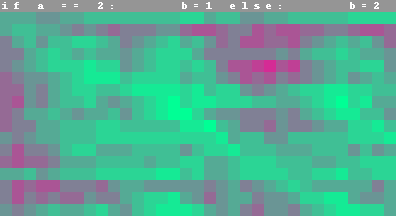

In [0]:
def visualize_neurons(neurons, code, act, cell_size=12):
    img = np.full((len(neurons) + 1, len(code), 3), 128)
    scores = (act[:, neurons].T + 1) / 2
    img[1:, :, 0] = 255 * (1 - scores)
    img[1:, :, 1] = 255 * scores

    f = BytesIO()
    img = scipy.misc.imresize(img, float(cell_size), interp='nearest')
    pil_img = PIL.Image.fromarray(img)
    draw = ImageDraw.Draw(pil_img)
    for idx, ch in enumerate(code):
        draw.text((idx * cell_size + 2, 0), ch)
    pil_img.save(f, 'png')
    return Image(data=f.getvalue())

img = visualize_neurons(neurons, example_code, act)
display(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


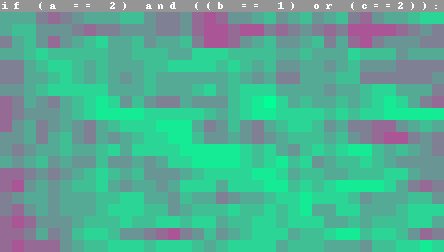

In [0]:
def image_for_code(code):
    act = activations(flat_model, code)
    neurons = interesting_neurons(act)
    return visualize_neurons(neurons, code, act)

display(image_for_code('if (a == 2) and ((b == 1) or (c==2)):'))

In [0]:
code = 'if (a == 2) and ((b == 1) or (c==2)):'
mask = '   ________     ____________________ '
act = activations(flat_model, code)
positive = [idx for idx, ch in enumerate(mask) if ch == '_']
negative = [idx for idx, ch in enumerate(mask) if ch != '_']

neurons = np.argsort(act[positive].sum(axis=0) - act[negative].sum(axis=0))[-5:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


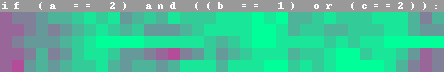

In [0]:
img = visualize_neurons(neurons, code, act)
display(img)

In [0]:
neurons

array([239, 247,  18,   7,   8])

In [0]:
act[negative, 108].sum()

0.06521046

In [0]:
x0 = 0
x1 = 0
for idx, ch in enumerate(mask):
    if ch == '_':
        x0 += act[idx, 108]
    else:
        x1 += act[idx, 108]
x0, x1

(0.19161548878764734, 0.06521046429406852)